In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib.pyplot import gca,show
from IPython.display import Math, display
import numpy as np
import scipy as sp
import sympy as sym
from scipy.special import kv,zeta, polygamma, factorial, erf
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
import cmasher as cmr
import mpmath as mp
from scipy.integrate import odeint, solve_ivp, ode, quad
import math
from mpmath import *
from sympy import Eq, Symbol, solve
from scipy.interpolate import griddata
interval = np.linspace(0.12,0.9)
colors = cmr.pride(interval)
cmap = LinearSegmentedColormap.from_list('name', colors)

def line_background(lw,col):
    return [pe.Stroke(linewidth=lw, foreground=col), pe.Normal()]


In [8]:
Rate_0 = np.loadtxt('Rates-0.dat', unpack=True,skiprows=1)
Rate_1 = np.loadtxt('Rates-01.dat', unpack=True,skiprows=1)
Rate_2 = np.loadtxt('Rates-02.dat', unpack=True,skiprows=1)
Rate_3 = np.loadtxt('Rates-03.dat', unpack=True,skiprows=1)
Rate_4 = np.loadtxt('Rates-04.dat', unpack=True,skiprows=1)
Rate_5 = np.loadtxt('Rates-05.dat', unpack=True,skiprows=1)


Rates_1_0 = np.loadtxt('Rates-1.dat', unpack=True,skiprows=1)
Rates_2_0 = np.loadtxt('Rates-2.dat', unpack=True,skiprows=1)


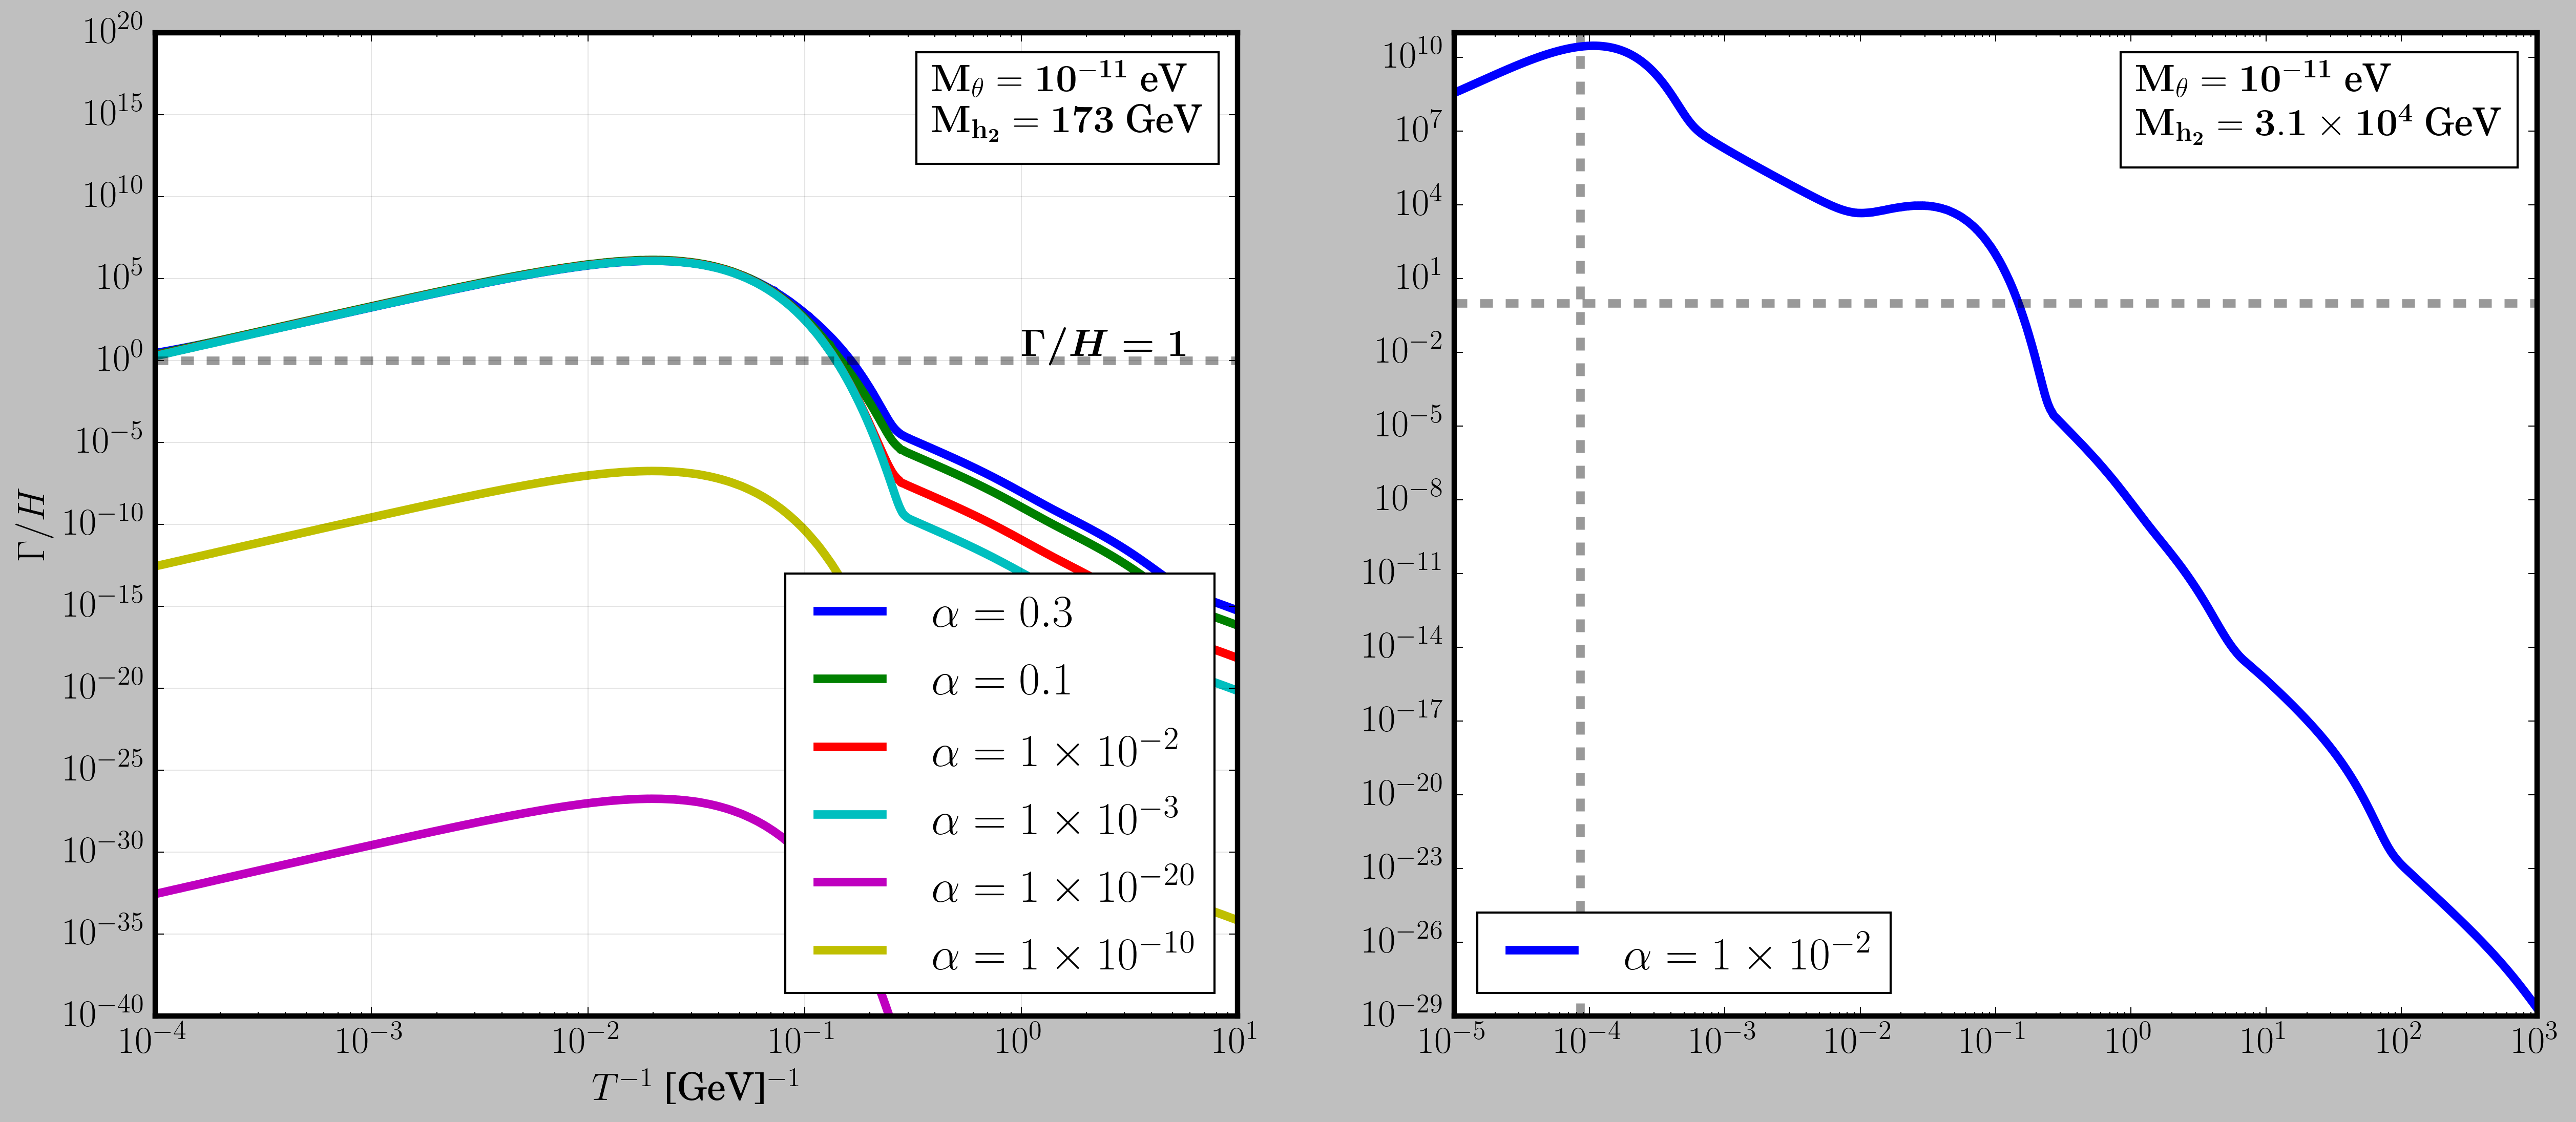

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8),  dpi =300)
plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.weight"] = "ultralight"
plt.rcParams["font.size"] = "18"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax = plt.gca()



#lamh = 0.5
#vh = 246
#lamphi = 1.0e-8
#vs 1.25e6      
#lamhphi = 2.0e-8

axes[0].loglog(1/Rate_0[0,:], Rate_0[4,:], lw = 4, label = '$\\alpha = 0.3$')
axes[0].loglog(1/Rate_1[0,:], Rate_1[4,:], lw = 4, label = '$\\alpha = 0.1$')
axes[0].loglog(1/Rate_2[0,:], Rate_2[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-2}$')
axes[0].loglog(1/Rate_3[0,:], Rate_3[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-3}$')
axes[0].loglog(1/Rate_4[0,:], Rate_4[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-20}$')
axes[0].loglog(1/Rate_5[0,:], Rate_5[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-10}$')

axes[0].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(173/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


axes[0].text(1,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)


axes[0].set_ylim(1.0e-40, 1.0e20)
axes[0].set_xlim(1.0e-4, 1.0e1)


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 173}$ GeV" , loc=1)

axes[0].add_artist(anchored_text_)


axes[0].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[0].set_ylabel('$\Gamma/H$')
axes[0].grid(ls = '-', alpha  = 0.1)
axes[0].legend(loc = 4)

axes[1].axvline(x= 1/(3.162278e+04/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#lamh = 0.258196
#vh = 246
#lamphi = 0.1 
#vs = 1.0e5
#lamhphi = 1.0e-4

#axes[1].loglog(1/Rates_1_0[0,:], Rates_1_0[4,:], lw = 4, label = '$\\alpha = 0.3$')
axes[1].loglog(1/Rates_2_0[0,:], Rates_2_0[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-2}$')
#axes[1].loglog(1/Rate_2[0,:], Rate_2[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-2}$')
#axes[1].loglog(1/Rate_3[0,:], Rate_3[4,:], lw = 4, label = '$\\alpha = 1 \\times 10^{-3}$')

anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 3.1 \times 10^4}$ GeV" , loc=1)
axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
axes[1].legend(loc = 3)


axes[1].add_artist(anchored_text_)


<font size="15"> $M_\theta \sim 10^{-11} eV$  </font>

<font size="10">Scenario 1: $M_{H_2} \sim M_H$ </font>

Aqui abaixo vou refazer o que foi feito acima considerando a dependencia do alpha. Relação obtida: 


$\nu_s > 2 \times \nu_h$, 

$\lambda_h = 0.26$,

$\lambda_\phi \sim \lambda_h$ (em ordem de obter $\alpha$ positivo)

$\lambda_{H \phi} < 10^{-5}$ (em ordem de obter $m_h = 125$ GeV)

In [3]:
Rate_d1 = np.loadtxt('Rates0.dat', unpack=True,skiprows=1)
Rate_d11 = np.loadtxt('Rates-0.dat', unpack=True,skiprows=1)
Rate_d2 = np.loadtxt('Rates1.dat', unpack=True,skiprows=1)
Rate_d3 = np.loadtxt('Rates2.dat', unpack=True,skiprows=1)

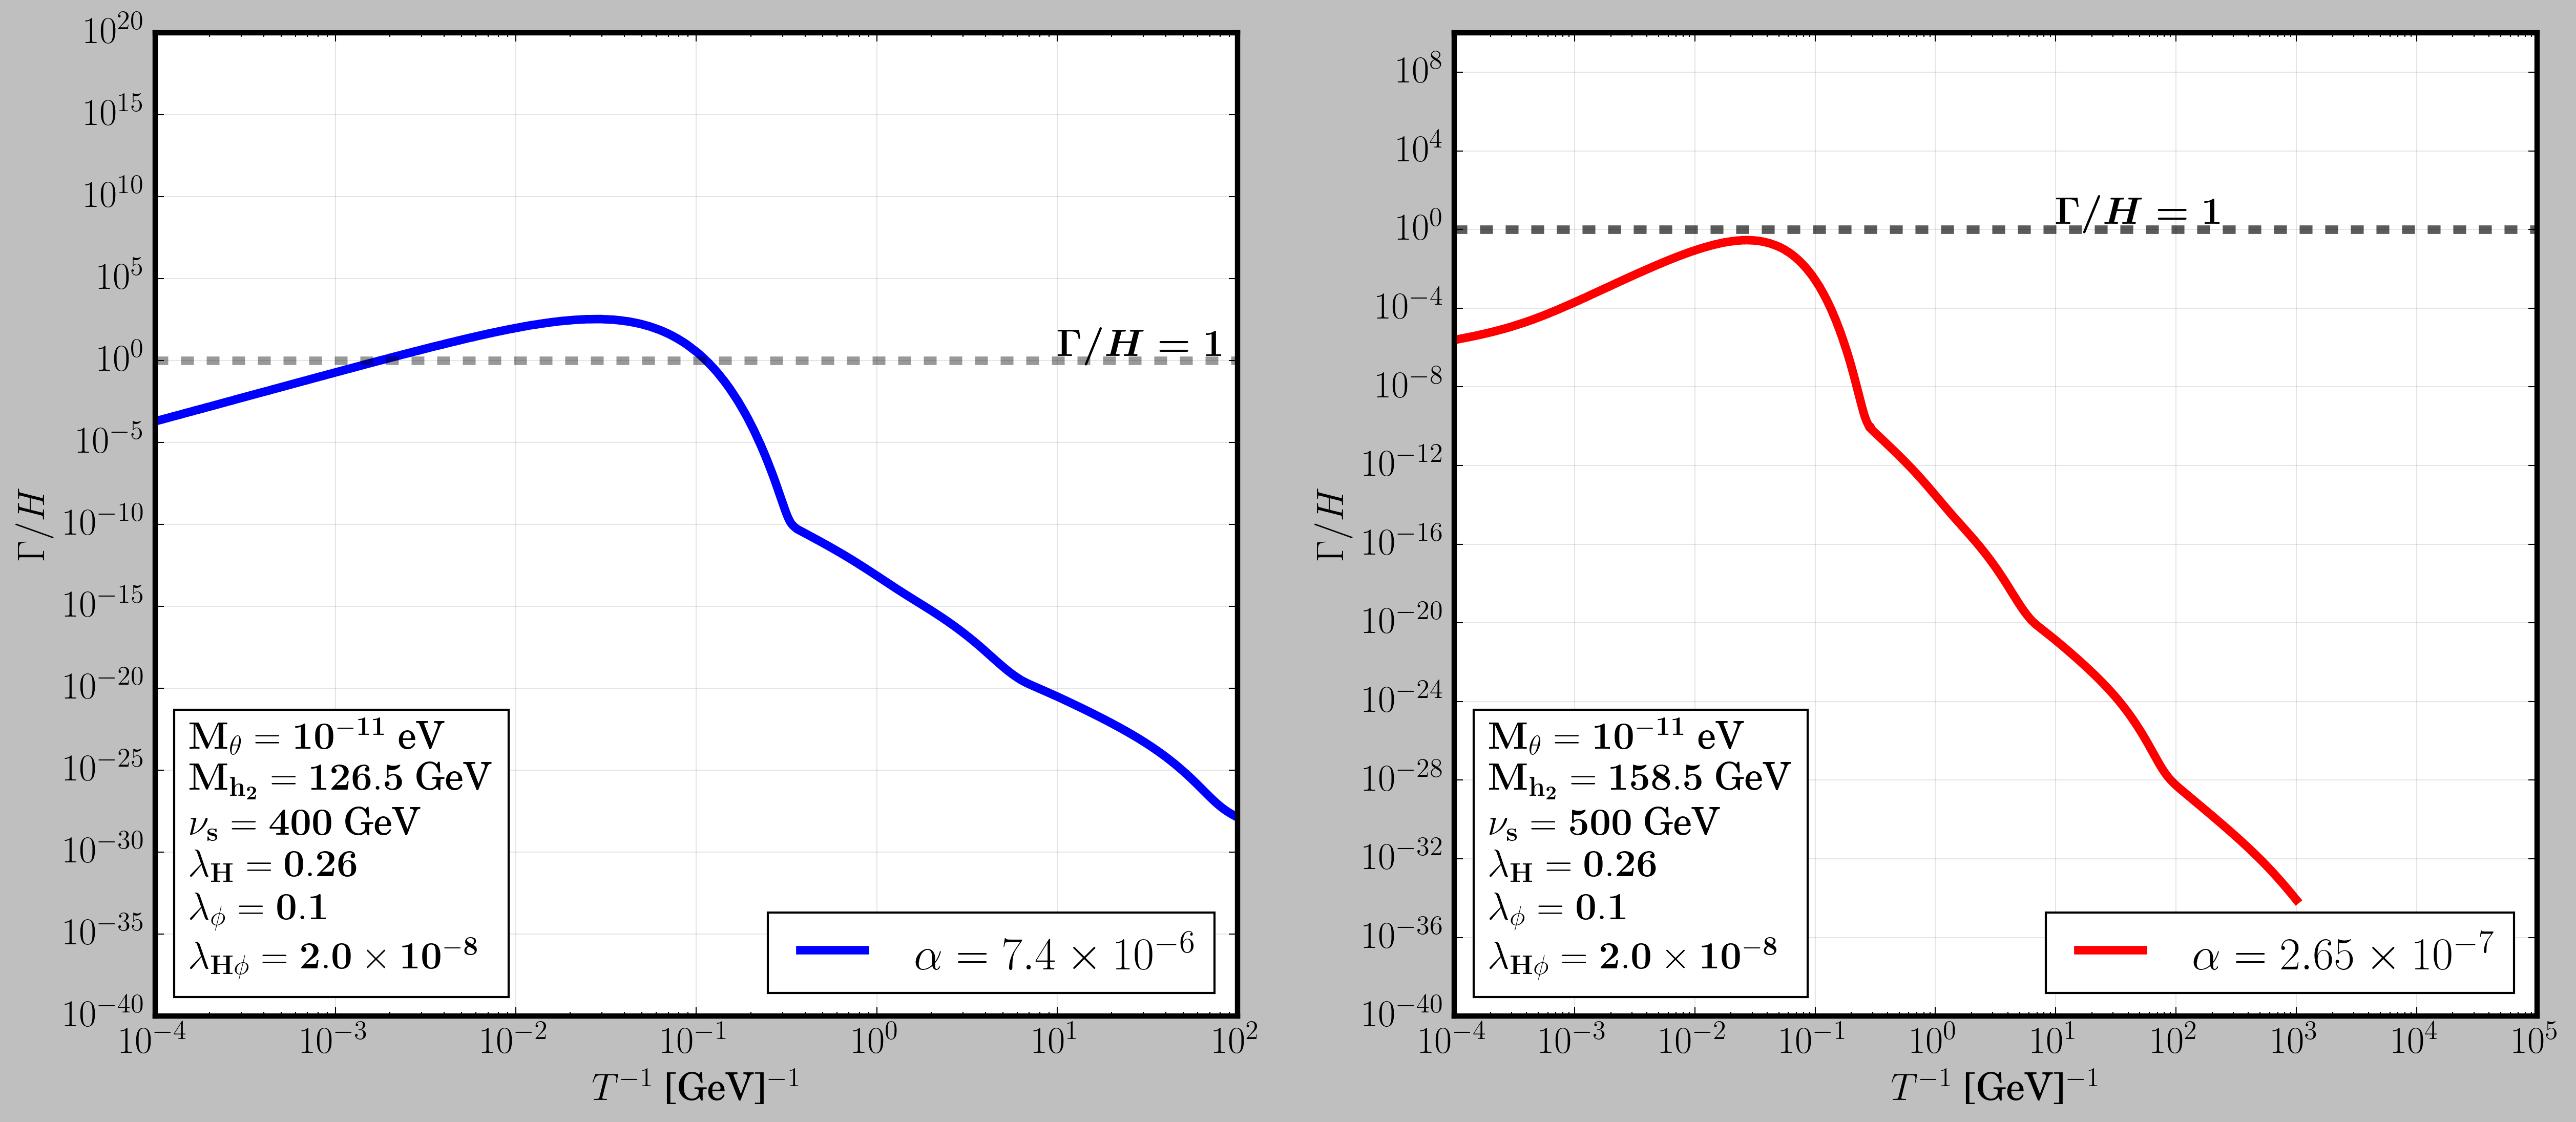

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8),  dpi =300)
plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.weight"] = "ultralight"
plt.rcParams["font.size"] = "18"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax = plt.gca()



#lamh = 0.5
#vh = 246
#lamphi = 1.0e-8
#vs 1.25e6      
#lamhphi = 2.0e-8

axes[0].loglog(1/Rate_d1[0,:], Rate_d1[5,:], lw = 4, label = '$\\alpha = 7.4 \\times 10^{-6}$')
#axes[0].loglog(1/Rate_d11[0,:], Rate_d11[5,:], lw = 4, label = '$\\alpha = 7.4 \\times 10^{-6}$')


axes[0].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(173/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


axes[0].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)


axes[0].set_ylim(1.0e-40, 1.0e20)
axes[0].set_xlim(1.0e-4, 1.0e2)


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 126.5}$ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 400}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 2.0 \times 10^{-8}}$" , loc=3)

axes[0].add_artist(anchored_text_)


axes[0].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[0].set_ylabel('$\Gamma/H$')
axes[0].grid(ls = '-', alpha  = 0.1)
axes[0].legend(loc = 4)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#lamh = 0.258196
#vh = 246
#lamphi = 0.1 
#vs = 1.0e5
#lamhphi = 1.0e-4

axes[1].loglog(1/Rate_d2[0,:], Rate_d2[5,:], lw = 4, color = 'r', label = '$\\alpha = 2.65 \\times 10^{-7}$')
#axes[1].loglog(1/Rate_d3[0,:], Rate_d3[5,:], lw = 4, color = 'k', label = '$\\alpha = 2.65 \\times 10^{-7}$')


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 158.5}$ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 500}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 2.0 \times 10^{-8}}$" , loc=3)

axes[1].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)
axes[1].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[1].set_ylabel('$\Gamma/H$')
axes[1].add_artist(anchored_text_)

axes[1].set_ylim(1.0e-40, 1.0e10)
axes[1].set_xlim(1.0e-4, 1.0e5)
axes[1].grid(ls = '-', alpha  = 0.1)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
axes[1].legend(loc = 4)


fig.savefig("thermalization.pdf")

<font size="10">Scenario 2: $M_{H_2} \ll M_H$ </font>

In [12]:
Rate_d5 = np.loadtxt('Rates4.dat', unpack=True,skiprows=1)
Rate_d6 = np.loadtxt('Rates5.dat', unpack=True,skiprows=1)

<ipython-input-19-3e691b4e9446>:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].loglog(1/Rate_d5[0,:], Rate_d5[5,:], lw = 4)#, label = '$\\alpha = -1.5 \\times 10^{-10}$')
No handles with labels found to put in legend.
<ipython-input-19-3e691b4e9446>:62: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].loglog(1/Rate_d6[0,:], Rate_d6[5,:], lw = 4, color = 'r', label = '$\\alpha = -1.5 \\times 10^{-12}$')


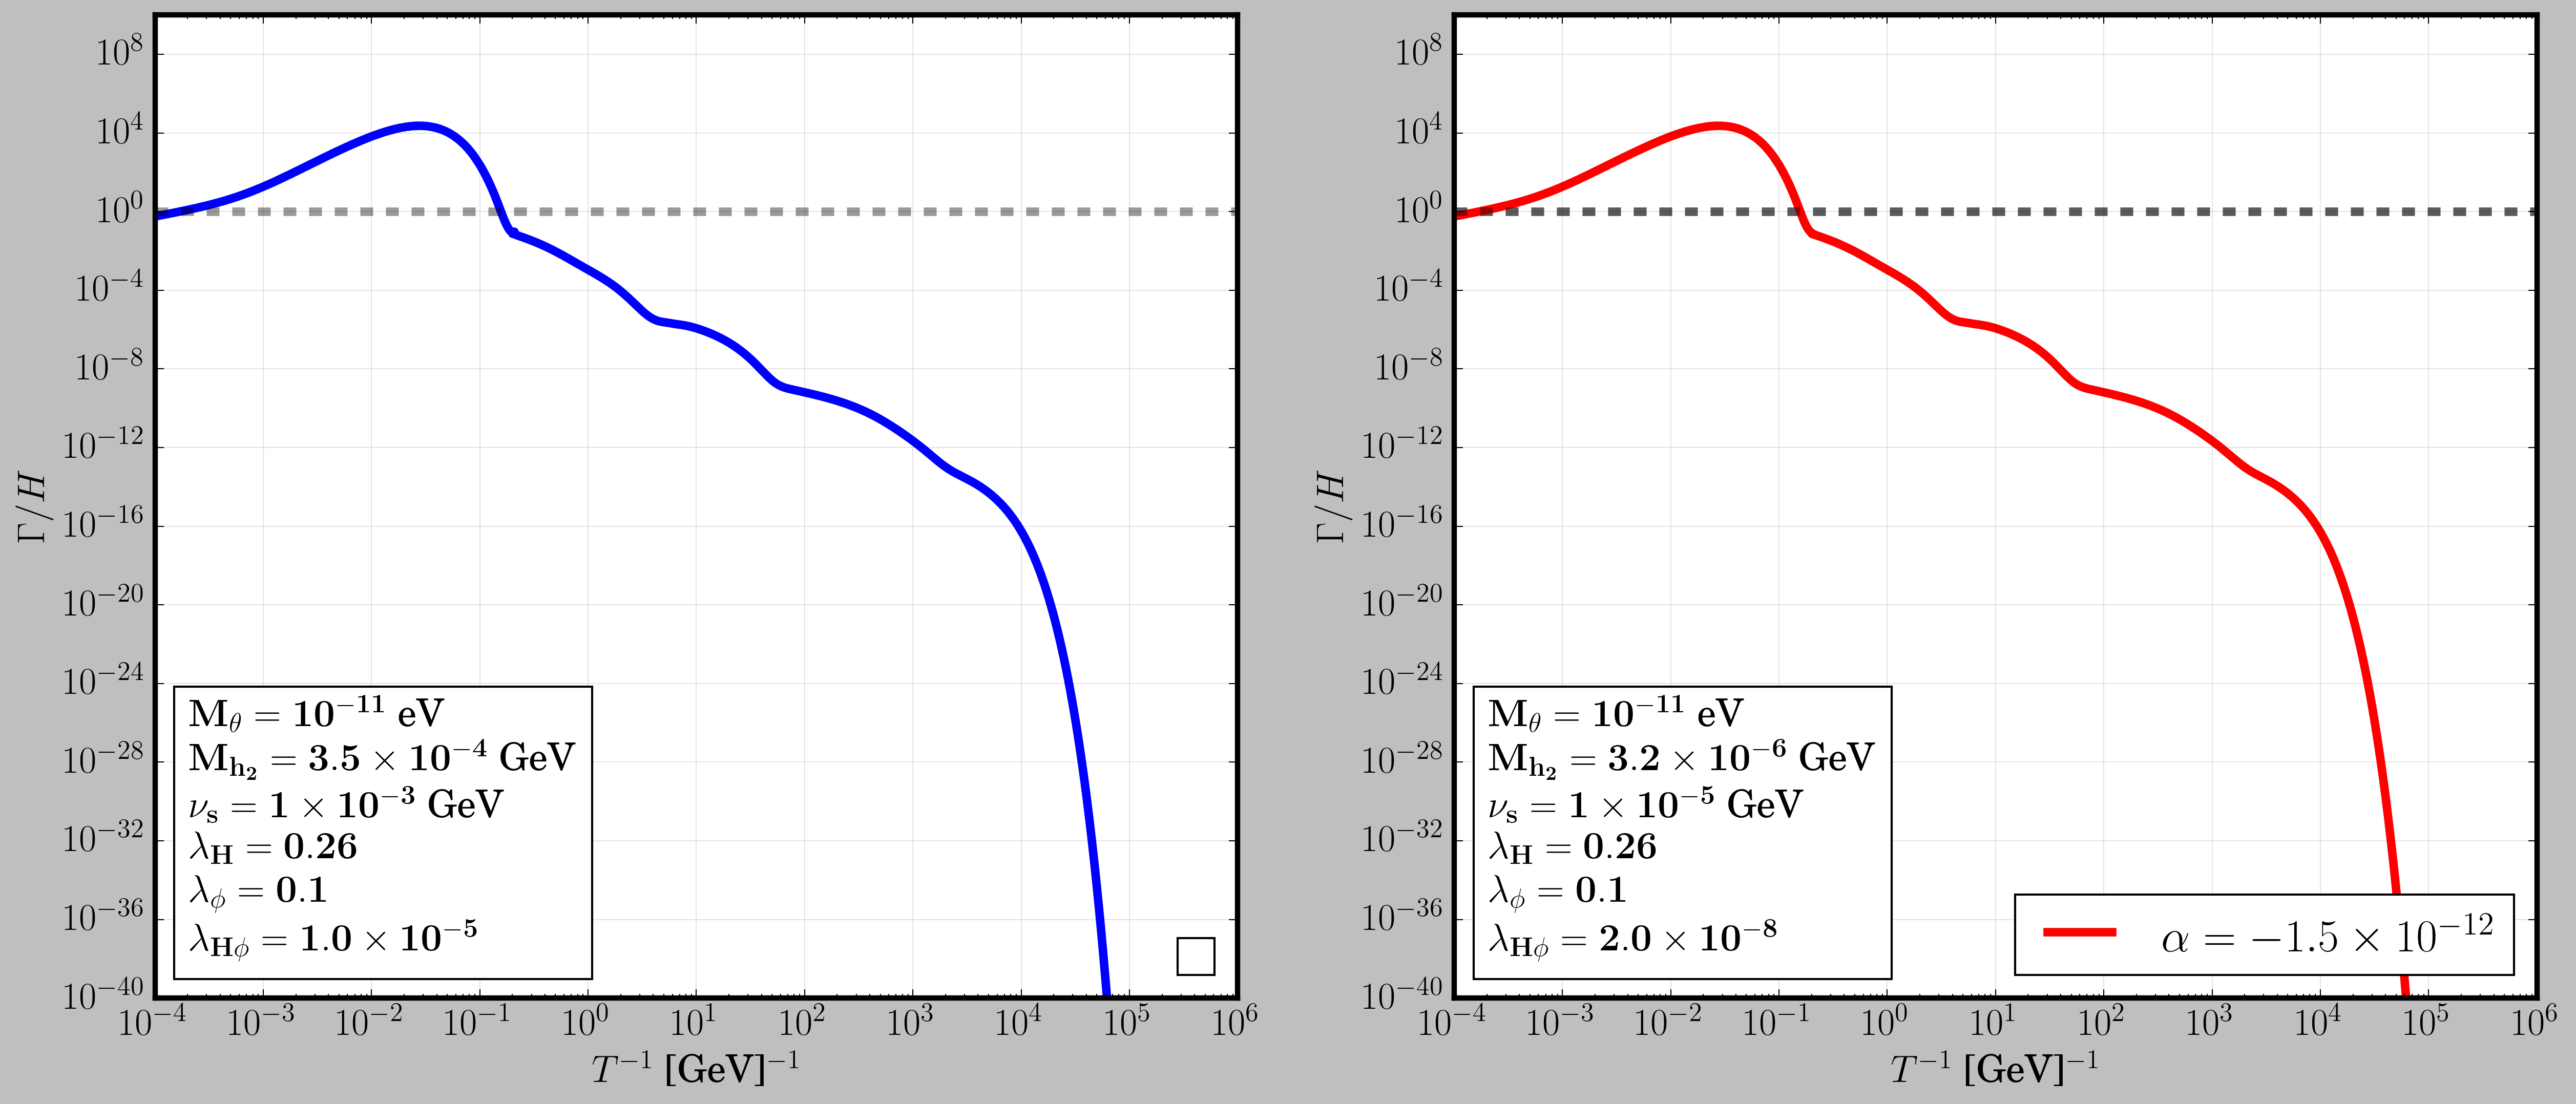

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8),  dpi =300)
plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.weight"] = "ultralight"
plt.rcParams["font.size"] = "18"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax = plt.gca()



#lamh = 0.5
#vh = 246
#lamphi = 1.0e-8
#vs 1.25e6      
#lamhphi = 2.0e-8

axes[0].loglog(1/Rate_d5[0,:], Rate_d5[5,:], lw = 4)#, label = '$\\alpha = -1.5 \\times 10^{-10}$')


axes[0].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#axes[0].axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)

#plt.axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(173/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#axes[0].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)


axes[0].set_ylim(1.0e-40, 1.0e10)
axes[0].set_xlim(1.0e-4, 1.0e6)


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 3.5 \times 10^{-4}}$ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 1 \times 10^{-3}}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 1.0 \times 10^{-5}}$" , loc=3)

axes[0].add_artist(anchored_text_)


axes[0].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[0].set_ylabel('$\Gamma/H$')
axes[0].grid(ls = '-', alpha  = 0.1)
axes[0].legend(loc = 4)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#lamh = 0.258196
#vh = 246
#lamphi = 0.1 
#vs = 1.0e5
#lamhphi = 1.0e-4

axes[1].loglog(1/Rate_d6[0,:], Rate_d6[5,:], lw = 4, color = 'r', label = '$\\alpha = -1.5 \\times 10^{-12}$')


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 3.2 \times 10^{-6}} $ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 1 \times 10^{-5}}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 2.0 \times 10^{-8}}$" , loc=3)

#axes[1].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)
axes[1].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[1].set_ylabel('$\Gamma/H$')
axes[1].add_artist(anchored_text_)

axes[1].set_ylim(1.0e-40, 1.0e10)
axes[1].set_xlim(1.0e-4, 1.0e6)
axes[1].grid(ls = '-', alpha  = 0.1)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
axes[1].legend(loc = 4)


#fig.savefig("thermalization_inverse.pdf")

<font size="10">Scenario 2: $M_{H_2} \gg M_H$ </font>

In [20]:
Rate_d7 = np.loadtxt('Rates6.dat', unpack=True,skiprows=1)
#Rate_d6 = np.loadtxt('Rates5.dat', unpack=True,skiprows=1)

No handles with labels found to put in legend.
<ipython-input-23-6a1e72457ddd>:62: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].loglog(1/Rate_d6[0,:], Rate_d6[5,:], lw = 4, color = 'r', label = '$\\alpha = -1.5 \\times 10^{-12}$')


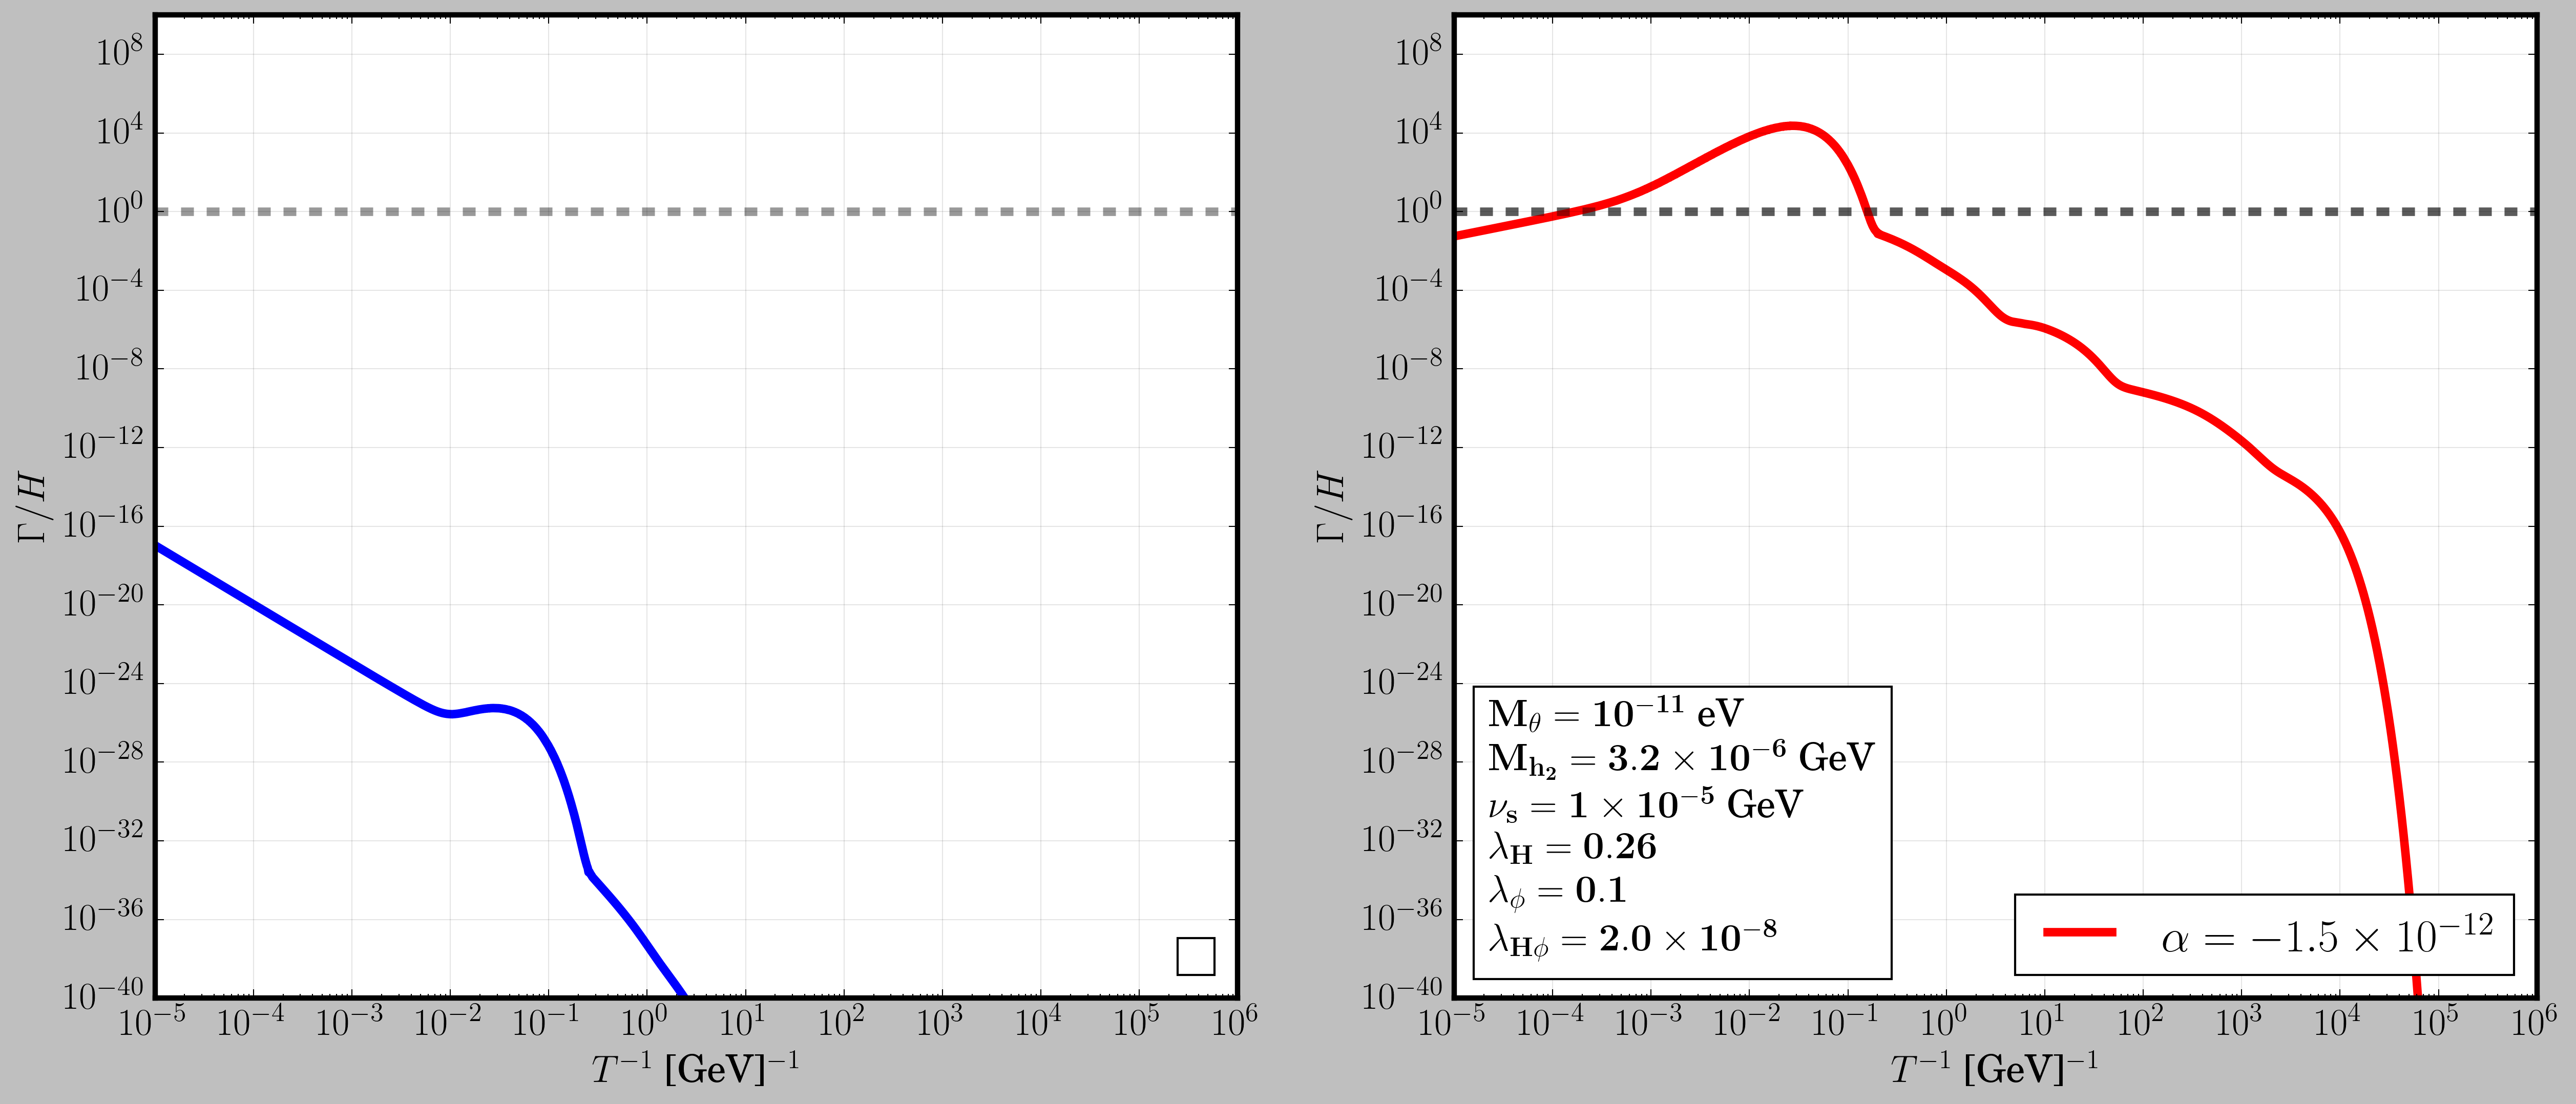

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8),  dpi =300)
plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.weight"] = "ultralight"
plt.rcParams["font.size"] = "18"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax = plt.gca()



#lamh = 0.5
#vh = 246
#lamphi = 1.0e-8
#vs 1.25e6      
#lamhphi = 2.0e-8

axes[0].loglog(1/Rate_d7[0,:], Rate_d7[5,:], lw = 4)#, label = '$\\alpha = -1.5 \\times 10^{-10}$')


axes[0].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#axes[0].axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)

#plt.axvline(x= 1/(125/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
#plt.axvline(x= 1/(173/2.7), color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#axes[0].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)


axes[0].set_ylim(1.0e-40, 1.0e10)
axes[0].set_xlim(1.0e-5, 1.0e6)


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 3.5 \times 10^{-4}}$ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 1 \times 10^{-3}}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 1.0 \times 10^{-5}}$" , loc=3)

#axes[0].add_artist(anchored_text_)


axes[0].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[0].set_ylabel('$\Gamma/H$')
axes[0].grid(ls = '-', alpha  = 0.1)
axes[0].legend(loc = 4)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)


#lamh = 0.258196
#vh = 246
#lamphi = 0.1 
#vs = 1.0e5
#lamhphi = 1.0e-4

axes[1].loglog(1/Rate_d6[0,:], Rate_d6[5,:], lw = 4, color = 'r', label = '$\\alpha = -1.5 \\times 10^{-12}$')


anchored_text_ = AnchoredText(r"$\mathbf{M_\theta = 10^{-11}}$ eV" + '\n'\
                              r"$\mathbf{M_{h_2} = 3.2 \times 10^{-6}} $ GeV" + '\n'\
                              r"$\mathbf{\nu_s = 1 \times 10^{-5}}$ GeV" + '\n'\
                              r"$\mathbf{\lambda_H = 0.26}$" + '\n'\
                              r"$\mathbf{\lambda_\phi = 0.1}$" + '\n'\
                              r"$\mathbf{\lambda_{H\phi} = 2.0 \times 10^{-8}}$" , loc=3)

#axes[1].text(10,2,r'$\boldsymbol{\Gamma/H = 1}$',color='k',fontsize=18, zorder = 11, rasterized=True)
axes[1].set_xlabel('$T^{-1}$ [GeV]$^{-1}$')
axes[1].set_ylabel('$\Gamma/H$')
axes[1].add_artist(anchored_text_)

axes[1].set_ylim(1.0e-40, 1.0e10)
axes[1].set_xlim(1.0e-5, 1.0e6)
axes[1].grid(ls = '-', alpha  = 0.1)

axes[1].axhline(y= 1, color = 'k', alpha = 0.4, ls= 'dashed', lw = 4)
axes[1].legend(loc = 4)


#fig.savefig("thermalization_inverse.pdf")

In [24]:
from scipy.special import zeta, polygamma, factorial, kn


In [26]:
kn(2,1)

1.6248388986351774

<ipython-input-33-6bd1df3412d5>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,10)
<ipython-input-33-6bd1df3412d5>:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.0e5)


(1e-05, 100000.0)

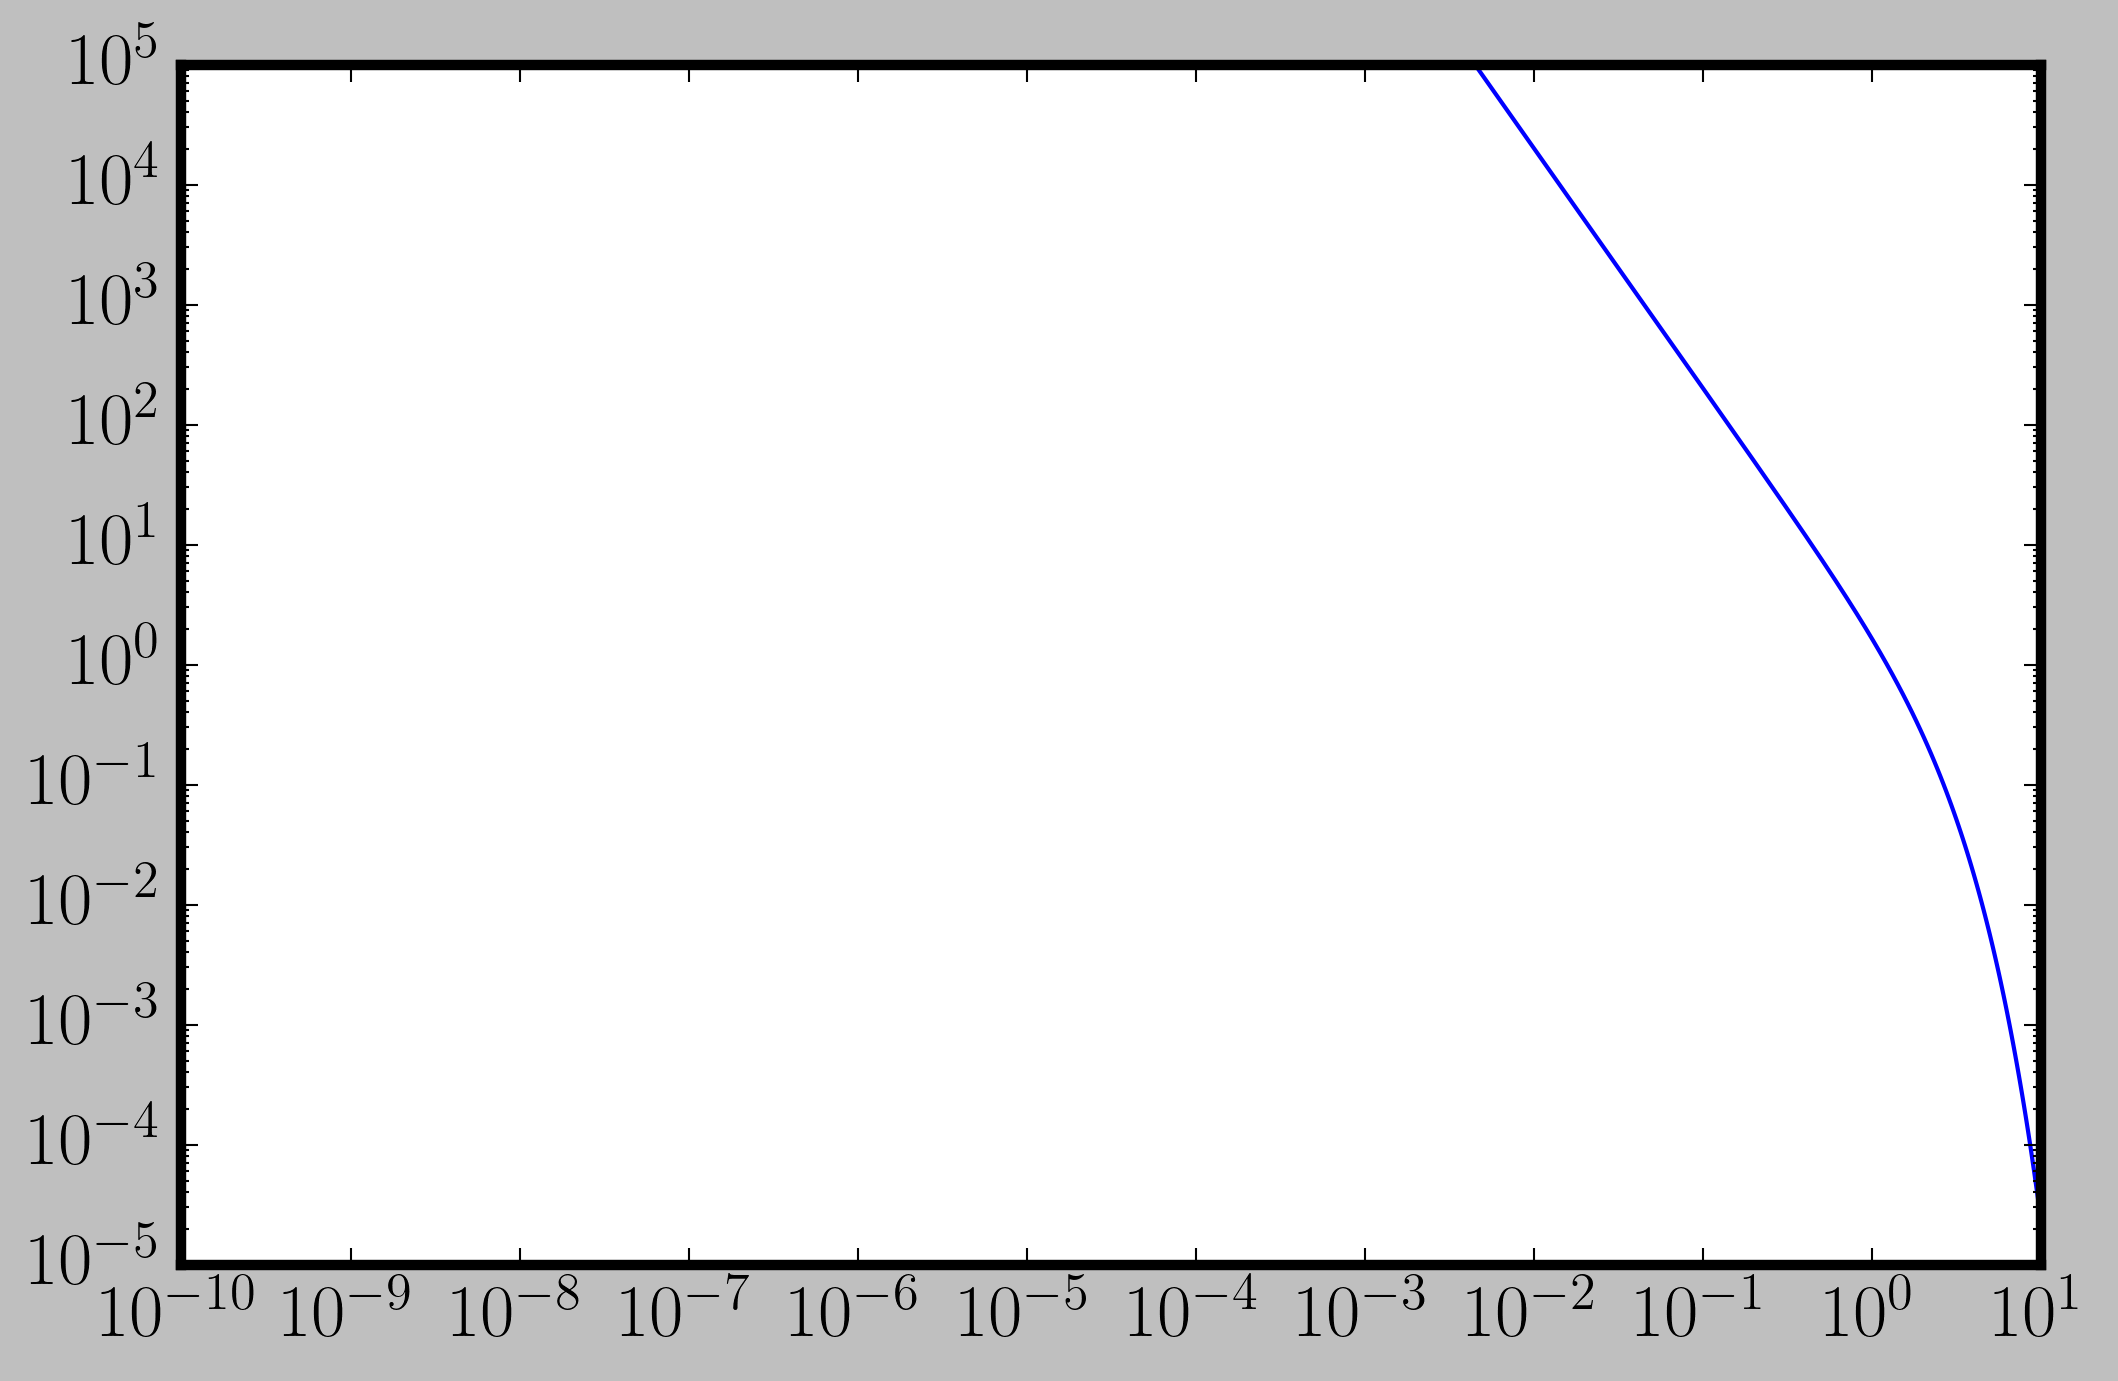

In [33]:
fig, axes = plt.subplots(figsize=(8, 5),  dpi =300)
plt.style.use('classic')
plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.weight"] = "ultralight"
plt.rcParams["font.size"] = "18"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
ax = plt.gca()



x = np.linspace(1.0e-10,1.0e1,100)


plt.loglog(x, kn(2,x))

#plt.xlim(0,10)
plt.ylim(0,1.0e5)